# Homework set 3

Please **submit this Jupyter notebook through Canvas** no later than **Mon Nov. 20, 9:00**. **Submit the notebook file with your answers (as .ipynb file) and a pdf printout. The pdf version can be used by the teachers to provide feedback. A pdf version can be made using the save and export option in the Jupyter Lab file menu.**

Homework is in **groups of two**, and you are expected to hand in original work. Work that is copied from another group will not be accepted.

# Exercise 0
Write down the names + student ID of the people in your group.

Run the following cell to import NumPy and Pyplot.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Exercise 1

In this exercise you will study the accuracy of several methods for computing the QR decomposition. You are asked to implement these methods yourself. (However, when testing your implementation you may compare with an external implementation.)


## (a) 
Implement the classical and modified Gram-Schmidt procedures for computing the QR decomposition.

Include a short documentation using triple quotes: describe at least the input and the output, and whether the code modifies the input matrix.


In [3]:
def classical_gram_schmidt(A:np.ndarray) -> (np.ndarray,np.ndarray) : 
    """Returns QR decomposition of matrix A obtained by classic gram schmidt orgthonanlization procedure. 
    Q and R are returned as a tuple. Method used specified in Heath Scientific Computing: An introductory survey: 5th edition p.131"""
    A = A.copy()
    m, n = A.shape
    Q = np.zeros((m, n))
    R = np.zeros((n, n))
    for k in range(n):
        q = A[:, k]
        j = 0
        for j in range(k):
            R[j,k] = Q[:,j].T @ A[:, k]
            q = q - R[j,k] * Q[:,j]
        R[k,k] = np.linalg.norm(q)
        if R[k,k] != 0:
            q = q/R[k,k]
            Q[:,k] = q
        else:
            break
    return Q, R

    
def modified_gram_schmidt(A):
    """Returns QR decomposition of matrix A obtained by classic gram schmidt orgthonanlization procedure. 
    Q and R are returned as a tuple. Method used specified in Heath Scientific Computing: An introductory survey: 5th edition p.132"""
    A = A.copy()
    m, n = A.shape
    Q = np.zeros((m, n))
    R = np.zeros((n, n))
    for k in range(n):
        R[k,k] = np.linalg.norm(A[:,k])
        if R[k,k] == 0:
            break
        Q[:,k] = A[:, k]/R[k,k]
        # starting at 1, to adhere to condition in Heath
        for j in range(k+1, n):
            R[k,j] = Q[:,k].T @ A[:, j]
            A[:, j] = A[:, j] - R[k,j]*Q[:,k]
    return Q, R




## (b) (a+b 3.5 pts)
Let $H$ be a Hilbert matrix of size $n$ (see Computer Problem 2.6). Study the quality of the QR decompositions obtained using the two methods of part (a), specifically the loss of orthogonality. In order to do so, plot the quantity $\| I - Q^T Q \|$ as a function of $n$ on a log scale. Vary $n$ from $2$ to $12$.



In [4]:
def make_hilbert_matrix(n: int) -> np.ndarray:
    """Returns a Hilbert matrix sized n by n."""
    H = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            H[i, j] = 1 / ((i + 1) + (j + 1) - 1)
    return H

In [5]:
# Testing
H = make_hilbert_matrix(3)
print(H)

[[1.         0.5        0.33333333]
 [0.5        0.33333333 0.25      ]
 [0.33333333 0.25       0.2       ]]


In [6]:
# Testing against reference numpy implementation
QR_reference = np.linalg.qr(H)[0]
QR_reference


array([[-0.85714286,  0.50160492,  0.11704115],
       [-0.42857143, -0.56848557, -0.70224688],
       [-0.28571429, -0.65208639,  0.70224688]])

In [7]:
QR_classic = classical_gram_schmidt(H)[0]
QR_classic

array([[ 0.85714286, -0.50160492,  0.11704115],
       [ 0.42857143,  0.56848557, -0.70224688],
       [ 0.28571429,  0.65208639,  0.70224688]])

In [8]:
QR_classic = modified_gram_schmidt(H)[0]
QR_classic

array([[ 0.85714286, -0.50160492,  0.11704115],
       [ 0.42857143,  0.56848557, -0.70224688],
       [ 0.28571429,  0.65208639,  0.70224688]])

Reflecting on the tests, our implementation looks fine. The only difference is the signs, which is acceptable considering a Q obtained from a QR decomposition is unique up until the signs.

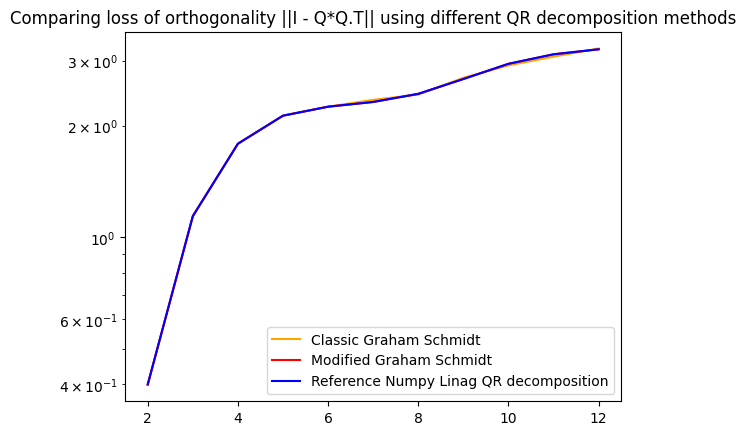

I_minus_Q_Qt_classic: [0.3999999999999988, 1.1399254501972176, 1.7886198105429398, 2.129721590748744, 2.251976073932503, 2.350148411790022, 2.4279776810939038, 2.6954767702827342, 2.911705760620351, 3.0744061132441125, 3.23481332024524]
I_minus_Q_Qt_modified: [0.3999999999999988, 1.139925450197168, 1.7886198105569349, 2.129721574834765, 2.251975049301451, 2.318989279992654, 2.439598105889169, 2.675057220452536, 2.940845433726328, 3.1197496386100085, 3.216876407010391]
I_minus_Q_Qt_reference: [0.4000000000000002, 1.1399254501971663, 1.7886198105569413, 2.129721574834604, 2.2519750493142703, 2.318989280008286, 2.439598096543433, 2.6750571747563803, 2.940846739801993, 3.1197327012036733, 3.2191459644672813]


In [12]:
n_range = range(2,13)

# creating a list of Q matrices with our classic Gram Schmidt orthogonalization based on Hilberts matrices with increasing n
list_of_Q_classic = []
for n in n_range:
    H = make_hilbert_matrix(n)
    Q_gram_classic = classical_gram_schmidt(H)[0]
    list_of_Q_classic.append(Q_gram_classic)

# Computing ||I - QQ.T|| for Gram Schmidt classic
I_minus_Q_Qt_classic = [np.linalg.norm(np.eye(Q.shape[0])-Q*Q.T) for Q in list_of_Q_classic]


# creating a list of Q matrices with our modified Gram Schmidt orthogonalization based on Hilberts matrices with increasing n
list_of_Q_modified = []
for n in n_range:
    H = make_hilbert_matrix(n)
    Q_gram_modified = modified_gram_schmidt(H)[0]
    list_of_Q_modified.append(Q_gram_modified)

# Computing ||I - QQ.T|| for Gram Schmidt modified
I_minus_Q_Qt_modified = [np.linalg.norm(np.eye(Q.shape[0])-Q*Q.T) for Q in list_of_Q_modified]

# creating a list of Q matrices with numpy reference QR decomposition based on Hilberts matrices with increasing n
list_of_Q_reference = [] 
for n in n_range:
    H = make_hilbert_matrix(n)
    Q_gram_reference = np.linalg.qr(H)[0]
    list_of_Q_reference.append(Q_gram_reference)

# Computing ||I - QQ.T|| for reference numpy implementation
I_minus_Q_Qt_reference = [np.linalg.norm(np.eye(Q.shape[0])-Q*Q.T) for Q in list_of_Q_reference]

# Plotting results
plt.title('Comparing loss of orthogonality ||I - Q*Q.T|| using different QR decomposition methods')
plt.plot(n_range,I_minus_Q_Qt_classic, c = 'orange', label = 'Classic Graham Schmidt')
plt.plot(n_range,I_minus_Q_Qt_modified, c = 'red', label = 'Modified Graham Schmidt')
plt.plot(n_range,I_minus_Q_Qt_reference, c = 'blue', label = 'Reference Numpy Linag QR decomposition')
plt.yscale('log')
plt.legend()
plt.show()

print('I_minus_Q_Qt_classic:',I_minus_Q_Qt_classic)
print('I_minus_Q_Qt_modified:', I_minus_Q_Qt_modified)
print('I_minus_Q_Qt_reference:', I_minus_Q_Qt_reference)


The observed loss of orthogonality is tiny for each method used.

## (c) (1.5 pts)
Try applying the classical procedure twice. Plot again the loss of orthogonality when computing the QR decomposition of the Hilbert matrix of size $n$ as in (b).


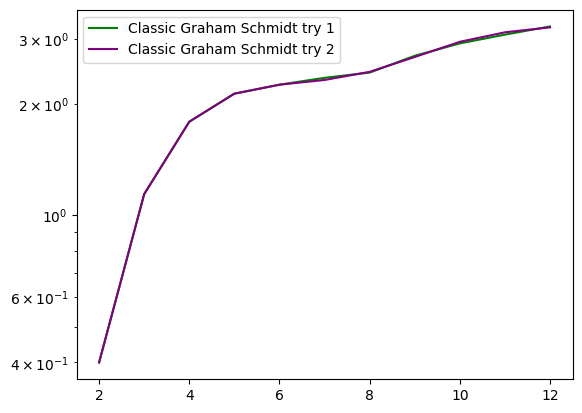

In [10]:
n_range = range(2,13)

# creating a list of Q matrices with our classic Gram Schmidt orthogonalization based on Hilberts matrices with increasing n
list_of_Q_classic_1 = []
for n in n_range:
    H = make_hilbert_matrix(n)
    Q_gram_classic = classical_gram_schmidt(H)[0]
    list_of_Q_classic.append(Q_gram_classic)

# Computing ||I - QQ.T|| for Gram Schmidt classic
I_minus_Q_Qt_classic_1 = [np.linalg.norm(np.eye(Q.shape[0])-Q*Q.T) for Q in list_of_Q_classic_1]

# creating a list of Q matrices with our classic Gram Schmidt orthogonalization based on Hilberts matrices with increasing n
list_of_Q_classic_2 = []
for n in n_range:
    H = make_hilbert_matrix(n)
    Q_gram_classic = classical_gram_schmidt(H)[0]
    list_of_Q_classic.append(Q_gram_classic)

# Computing ||I - QQ.T|| for Gram Schmidt classic
I_minus_Q_Qt_classic_2 = [np.linalg.norm(np.eye(Q.shape[0])-Q*Q.T) for Q in list_of_Q_classic_2]


plt.plot(n_range,I_minus_Q_Qt_classic, c = 'green', label = 'Classic Graham Schmidt try 1')
plt.plot(n_range,I_minus_Q_Qt_modified, c = 'purple', label = 'Classic Graham Schmidt try 2')
plt.yscale('log')
plt.legend()
plt.show()

We can see very slight differences in loss of orthogonality. A good next step might be to investigate to see if we find a similar level of variance in modified version of Graham Schmidt and in the numpy reference implementation.

## (d) (2 pts)
Implement the Householder method for computing the QR decomposition. Remember to include a short documentation.

In [11]:
def householder_qr(A):
    # YOUR CODE HERE

SyntaxError: incomplete input (2024703894.py, line 2)

## (e) (2 pts)
Perform the analysis of (b) for the Householder method. Discuss the differences between all the methods you have tested so far. Look online and/or in books for information about the accuracy of the different methods and include this in your explanations (with reference).


In [ ]:
# YOUR CODE HERE